In [1]:
from typing import Tuple

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def apply_sobel_filter(image_path: str
    )-> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Applies the Sobel filter in X and Y to a input image and returns each
    step.

    Args:
        image_path (str): Path to the input image

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]: A tuple
            containing the gray image, the sobel in x, the sobel in y, and the
            sobel combining x and y.
    """
    # Read the image
    image: np.ndarray = cv2.imread(image_path)

    # BGR to grayscale
    gray_img: np.ndarray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Sobel in x direction
    sobel_x_img: np.ndarray = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_x_uint8: np.ndarray = np.uint8(np.absolute(sobel_x_img))

    # Apply Sobel in y direction
    sobel_y_img: np.ndarray = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_y_uint8: np.ndarray = np.uint8(np.absolute(sobel_y_img))

    # Combine sobel
    sobel_combined_img: np.ndarray = cv2.magnitude(sobel_x_img, sobel_y_img)

    # Convert to 8-bit image
    sobel_combined_uint8: np.ndarray = np.uint8(np.absolute(sobel_combined_img))

    # Display the results
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Grayscale Image')
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Sobel X')
    plt.imshow(np.uint8(np.absolute(sobel_x_img)), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title('Sobel Y')
    plt.imshow(np.uint8(np.absolute(sobel_y_img)), cmap='gray')
    plt.axis('off')

    plt.figure(figsize=(5, 5))
    plt.title('Sobel Combined')
    plt.imshow(sobel_combined_uint8, cmap='gray')
    plt.axis('off')

    plt.show()

    return (gray_img, sobel_x_uint8, sobel_y_uint8, sobel_combined_uint8)

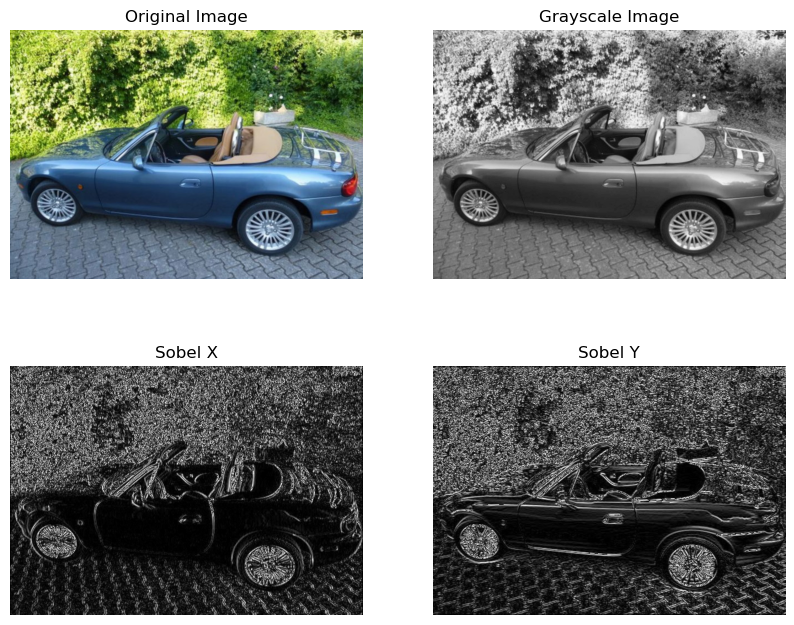

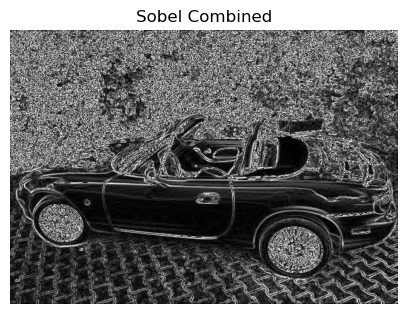

In [3]:
if __name__ == '__main__':
    img_name: str = 'car'
    img_ext: str = 'jpg'
    img_path: str = f'src/imgs/{img_name}.{img_ext}'
    gray, sobel_x, sobel_y, sobel_combined = apply_sobel_filter(img_path)

    cv2.imwrite(f'src/imgs/{img_name}_grayscale_image.{img_ext}', gray)
    cv2.imwrite(f'src/imgs/{img_name}_sobel_x_result.{img_ext}', np.uint8(np.absolute(sobel_x)))
    cv2.imwrite(f'src/imgs/{img_name}_sobel_y_result.{img_ext}', np.uint8(np.absolute(sobel_y)))
    cv2.imwrite(f'src/imgs/{img_name}_sobel_combined_result.{img_ext}', sobel_combined)